<a href="https://colab.research.google.com/github/kedzkiest/2.5D_prototype/blob/main/Practice/MLP%E3%81%AB%E3%82%88%E3%82%8BMNIST%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform = transform)

In [5]:
num_batches = 100

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [7]:
train_iter = iter(train_dataloader)

In [8]:
imgs, labels = train_iter.next()

In [9]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [10]:
labels

tensor([4, 6, 7, 1, 3, 3, 3, 8, 7, 2, 1, 9, 6, 4, 2, 1, 3, 9, 7, 4, 3, 1, 2, 4,
        9, 8, 4, 6, 4, 1, 8, 6, 5, 9, 6, 7, 2, 8, 1, 7, 8, 7, 6, 9, 3, 7, 9, 2,
        8, 1, 8, 3, 1, 2, 9, 5, 4, 7, 0, 7, 1, 2, 0, 6, 0, 2, 3, 1, 5, 4, 9, 0,
        5, 1, 5, 3, 9, 7, 6, 3, 5, 0, 7, 4, 8, 1, 9, 9, 6, 9, 1, 2, 4, 6, 6, 7,
        5, 0, 7, 6])

In [11]:
img = imgs[0]

In [12]:
img_permute = img.permute(1, 2, 0)

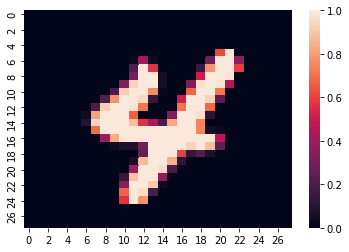

In [13]:
sns.heatmap(img_permute.numpy()[:,:,0])

In [14]:
labels[0]

tensor(4)

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [16]:
model = MLP()

In [17]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim = 1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc.cpu())
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.31512345393809177, acc: 0.9048839807510376
epoch: 1, loss: 0.11239510325404505, acc: 0.9660336375236511
epoch: 2, loss: 0.07495081354087839, acc: 0.9766491055488586
epoch: 3, loss: 0.053669952081982046, acc: 0.9837653636932373
epoch: 4, loss: 0.039547471893213997, acc: 0.9878490567207336
epoch: 5, loss: 0.03259703271110387, acc: 0.9896985292434692
epoch: 6, loss: 0.027050512914235395, acc: 0.9911485910415649
epoch: 7, loss: 0.02342769756471777, acc: 0.9921985268592834
epoch: 8, loss: 0.01947828931787323, acc: 0.9934817552566528
epoch: 9, loss: 0.01756294263010204, acc: 0.9944319128990173
epoch: 10, loss: 0.014060861837278935, acc: 0.9951654076576233
epoch: 11, loss: 0.016081859186318374, acc: 0.9947487711906433
epoch: 12, loss: 0.014088764617226843, acc: 0.9951318502426147
epoch: 13, loss: 0.010336765415831905, acc: 0.9966986179351807
epoch: 14, loss: 0.010712236575321488, acc: 0.9965490698814392


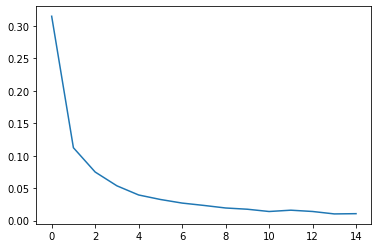

In [20]:
plt.plot(losses)

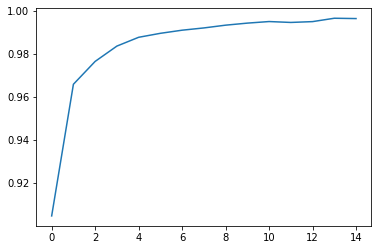

In [21]:
plt.plot(accs)

In [22]:
train_iter = iter(train_dataloader)

In [23]:
imgs, labels = train_iter.next()

In [24]:
labels

tensor([4, 7, 7, 6, 9, 4, 0, 3, 7, 2, 1, 9, 1, 1, 5, 8, 7, 1, 9, 1, 6, 1, 2, 8,
        0, 1, 1, 5, 9, 7, 9, 1, 1, 7, 6, 3, 4, 1, 6, 4, 2, 7, 6, 0, 6, 1, 5, 9,
        9, 7, 7, 5, 6, 5, 6, 1, 2, 9, 6, 7, 4, 1, 9, 4, 3, 9, 4, 7, 0, 3, 2, 7,
        0, 8, 9, 2, 1, 8, 4, 7, 7, 5, 7, 4, 7, 2, 5, 1, 7, 0, 6, 3, 0, 7, 5, 6,
        3, 3, 7, 9])

In [25]:
img_gpu = imgs.view(100, -1).to(device)

In [27]:
output = model(img_gpu)

In [28]:
pred = torch.argmax(output, dim=1)

In [29]:
pred

tensor([4, 7, 7, 6, 9, 4, 0, 3, 7, 2, 1, 9, 1, 1, 5, 8, 7, 1, 9, 1, 6, 1, 2, 8,
        0, 1, 1, 5, 9, 7, 9, 1, 1, 7, 6, 3, 4, 1, 6, 4, 2, 7, 6, 0, 6, 1, 5, 9,
        9, 7, 7, 5, 6, 5, 6, 1, 2, 9, 6, 7, 4, 1, 9, 4, 3, 9, 4, 7, 0, 3, 2, 7,
        0, 8, 9, 2, 1, 8, 4, 7, 7, 5, 7, 4, 7, 2, 5, 1, 7, 0, 6, 3, 0, 7, 5, 6,
        3, 3, 7, 9], device='cuda:0')

In [30]:
params = model.state_dict()

In [31]:
torch.save(params, "model.prm")

In [32]:
!ls

data  model.prm  sample_data


In [33]:
param_load = torch.load("model.prm")

In [34]:
model.load_state_dict(param_load)

<All keys matched successfully>